In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Amenity Detection'   'Colab Notebooks'       LicensePlateDetector
'Car Classification'  'Getting started.pdf'


In [0]:
!unzip -q "/mydrive/LicensePlateDetector/darknet.zip" -d '/content'

In [0]:
# Change directory to darknet
%cd darknet

/content/darknet


In [0]:
# need to convert files to unix format
!sudo apt install dos2unix
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolov3_custom_train.cfg
!dos2unix ./cfg/yolov3_custom_train_small.cfg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (3,651 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preco

In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
# make darknet (build)
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN 

In [0]:
# train your custom detector   
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg darknet53.conv.74 >> /mydrive/LicensePlateDetector/backup/training.log

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
# restart training from last weights
#!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg /mydrive/LicensePlateDetector/backup/yolov3_custom_train_800.weights -dont_show

In [0]:
!grep "avg"  /mydrive/LicensePlateDetector/backup/training.log

1: 1240.552002, 1240.552002 avg, 0.000000 rate, 4.361582 seconds, 64 images
2: 1241.539062, 1240.650757 avg, 0.000000 rate, 4.465900 seconds, 128 images
3: 1243.774292, 1240.963135 avg, 0.000000 rate, 4.368809 seconds, 192 images
4: 1242.755493, 1241.142334 avg, 0.000000 rate, 4.374248 seconds, 256 images
5: 1240.711792, 1241.099243 avg, 0.000000 rate, 4.345475 seconds, 320 images
6: 1242.573608, 1241.246704 avg, 0.000000 rate, 4.328326 seconds, 384 images
7: 1242.038940, 1241.325928 avg, 0.000000 rate, 4.359783 seconds, 448 images
8: 1240.510620, 1241.244385 avg, 0.000000 rate, 4.404040 seconds, 512 images
9: 1241.728027, 1241.292725 avg, 0.000000 rate, 4.344873 seconds, 576 images
10: 1243.110474, 1241.474487 avg, 0.000000 rate, 4.422685 seconds, 640 images
11: 1242.164551, 1241.543457 avg, 0.000000 rate, 4.328291 seconds, 704 images
12: 1243.707275, 1241.759888 avg, 0.000000 rate, 4.371142 seconds, 768 images
13: 1242.028687, 1241.786743 avg, 0.000000 rate, 4.399105 seconds, 832 ima

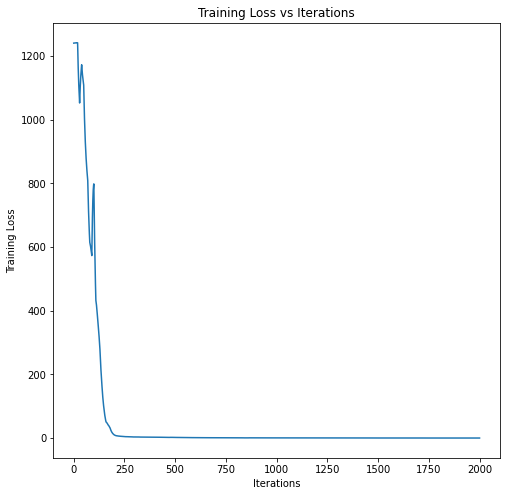

In [0]:
f = open('/mydrive/LicensePlateDetector/backup/training.log')

lines = [line.rstrip("\n") for line in f.readlines()]

numbers = {'1', '2', '3', '4', '5', '6', '7', '8', '9'}

iters = []
loss = []

fig, ax = plt.subplots(figsize=(8,8))

prev_line = ""
for line in lines:
    args = line.split(' ')
    if args[0][-1:] == ':' and args[0][0] in numbers:
        iters.append(int(args[0][:-1]))
        loss.append(float(args[2]))

ax.plot(iters, loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

ticks = range(0, 250, 10)
plt.show()

**Model Evaluation**

In [0]:
!git clone https://github.com/Cartucho/mAP

Cloning into 'mAP'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 908 (delta 13), reused 18 (delta 5), pack-reused 880
Receiving objects: 100% (908/908), 14.72 MiB | 15.30 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [0]:
# remove original input folders
!rm -r mAP/input/detection-results
!rm -r mAP/input/ground-truth
!rm -r mAP/input/images-optional

In [0]:
!mkdir mAP/input/detection-results
!mkdir mAP/input/ground-truth

In [0]:
inpWidth = 416  #608     #Width of network's input image
inpHeight = 416 #608     #Height of network's input image
confThreshold = 0.6  #Confidence threshold
nmsThreshold = 0.5  #Non-maximum suppression threshold

In [0]:
# save results of output to google drive
def save_output_to_google_drive(iteration):
    os.makedirs('/mydrive/LicensePlateDetector/backup/iteration_' + str(iteration) + '_eval', exist_ok=True)
    destination = '/mydrive/LicensePlateDetector/backup/iteration_' + str(iteration) + '_eval'
    output_files = os.listdir('/content/darknet/mAP/output')
    for elem in output_files:
        if elem == 'classes':
          shutil.copyfile('mAP/output/classes/LicensePlate.png', destination + '/LicensePlate.png')
        else:  
          shutil.copyfile('mAP/output/' + elem, destination + '/' + elem)

In [0]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [0]:
def create_prediction_file():
      all_files = os.listdir('data/val')
      actual_labels = [i for i in all_files if '.txt' in i]
      pred_imgs = [i for i in all_files if '.jpg' in i]
      classes = {'0': 'LicensePlate'}

      # preprocess ground truth labels
      for elem in actual_labels:
          img = cv2.imread('data/val/' + elem.split('.')[0] + '.jpg')
          imheight = img.shape[0]
          imwidth = img.shape[1]
          transformed = []
          file = open('data/val/' + str(elem), 'r')
          labels = file.readlines()
          labels = [x.strip() for x in labels]
          for l in labels:
              content = l.split(' ')
              classtype = content[0]
              xmid = float(content[1])
              ymid = float(content[2])
              width = float(content[3])
              height = float(content[4])

              left = int(max((xmid - (width/2)), 0) * imwidth)
              top = int(max((ymid - (height/2)), 0) * imheight)
              right = int(max((xmid + (width/2)), 0) * imwidth)
              bottom =  int(max((ymid + (height/2)), 0) * imheight)
              # format should be <class_name> <left> <top> <right> <bottom>
              transformed.append(str(classes[classtype] + ' ' + str(left) + ' ' + 
                                     str(top) + ' ' + str(right) + ' ' + str(bottom) + '\n'))
          outfile = open('mAP/input/ground-truth/' + elem, 'w')
          outfile.writelines(transformed)
          file.close()
          outfile.close()

      # preproces predictions
      for indexx, elem in enumerate(pred_imgs):
          #print(indexx)
          img = cv2.imread('data/val/' + elem.split('.')[0] + '.jpg')
          imheight = img.shape[0]
          imwidth = img.shape[1]
          cap = cv2.VideoCapture('data/val/' + elem.split('.')[0] + '.jpg')

          while cv2.waitKey(1) < 0:
            # get frame from the video
            hasFrame, frame = cap.read()
            # Stop the program if reached end of video
            if not hasFrame:
                cv2.waitKey(30)
                break
        
            # Create a 4D blob from a frame.
            blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)
            # Sets the input to the network
            net.setInput(blob)
            # Runs the forward pass to get output of the output layers
            outs = net.forward(getOutputsNames(net))
            # Remove the bounding boxes with low confidence
            #### COPIED FROM POSTPROCESS
            frameHeight = frame.shape[0]
            frameWidth = frame.shape[1]

            classIds = []
            confidences = []
            boxes = []
            # Scan through all the bounding boxes output from the network and keep only the
            # ones with high confidence scores. Assign the box's class label as the class with the highest score.
            classIds = []
            confidences = []
            boxes = []
            for out in outs:
                for detection in out:
                    scores = detection[5:]
                    classId = np.argmax(scores)
                    confidence = scores[classId]
                    if confidence > confThreshold:
                        center_x = int(detection[0] * frameWidth)
                        center_y = int(detection[1] * frameHeight)
                        width = int(detection[2] * frameWidth)
                        height = int(detection[3] * frameHeight)
                        left = int(center_x - width / 2)
                        top = int(center_y - height / 2)
                        classIds.append(classId)
                        confidences.append(float(confidence))
                        boxes.append([left, top, width, height])

            # Perform non maximum suppression to eliminate redundant overlapping boxes with
            # lower confidences.
            indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
            transformed = []
            for i in indices:
                i = i[0]
                box = boxes[i]
                left = max(box[0], 0)
                top = max(box[1], 0)
                width = max(box[2], 0)
                height = max(box[3], 0)

                transformed.append(str(classes[str(classIds[i])] + ' ' + str(round(confidences[i], 4)) + ' ' + str(left) + ' ' + 
                                       str(top) + ' ' + str(min(left + width, imwidth)) + ' ' + str(min(top + height, imheight)) + '\n'))

          outfile = open('mAP/input/detection-results/' + elem.split('.')[0] + '.txt', 'w')
          outfile.writelines(transformed)
          outfile.close()

In [0]:
# do evaluation for final iteration (2000)
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_final.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(2000)

/content/darknet/mAP
73.08% = LicensePlate AP 
mAP = 73.08%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_1800
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_1800.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(1800)

/content/darknet/mAP
74.58% = LicensePlate AP 
mAP = 74.58%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_1600
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_1600.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(1600)

/content/darknet/mAP
57.90% = LicensePlate AP 
mAP = 57.90%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_1400
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_1400.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(1400)

/content/darknet/mAP
63.97% = LicensePlate AP 
mAP = 63.97%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_1200
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_1200.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(1200)

/content/darknet/mAP
59.62% = LicensePlate AP 
mAP = 59.62%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_1000
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_1000.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(1000)

/content/darknet/mAP
43.05% = LicensePlate AP 
mAP = 43.05%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_800
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_800.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(800)

/content/darknet/mAP
41.38% = LicensePlate AP 
mAP = 41.38%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_600
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_600.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(600)

/content/darknet/mAP
13.14% = LicensePlate AP 
mAP = 13.14%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_400
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_400.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(400)

/content/darknet/mAP
0.13% = LicensePlate AP 
mAP = 0.13%
<Figure size 640x480 with 1 Axes>
/content/darknet


In [0]:
# do evaluation for iteration_200
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_200.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

create_prediction_file()

%cd mAP
!python main.py
%cd ..

save_output_to_google_drive(200)

/content/darknet/mAP
0.00% = LicensePlate AP 
mAP = 0.00%
Traceback (most recent call last):
  File "main.py", line 846, in <module>
    true_p_bar
  File "main.py", line 246, in draw_plot_func
    sorted_keys, sorted_values = zip(*sorted_dic_by_value)
ValueError: not enough values to unpack (expected 2, got 0)
/content/darknet


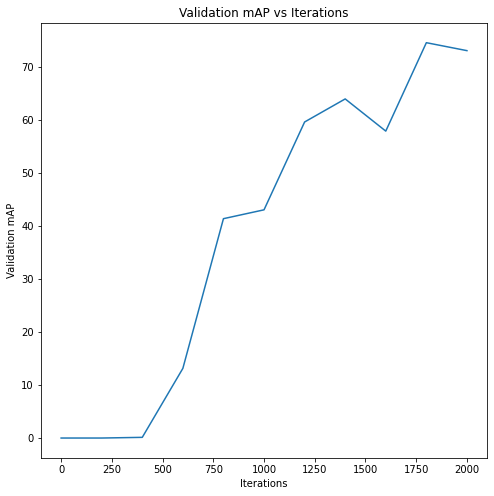

In [0]:
## Plot Evaluation Chart
val_map = [0, 0, 0.13, 13.14, 41.38, 43.05, 59.62, 63.97, 57.90, 74.58, 73.08]
iterations = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(iterations, val_map)
plt.xlabel('Iterations')
plt.ylabel('Validation mAP (%)')
plt.title('Validation mAP vs Iterations')

plt.show()

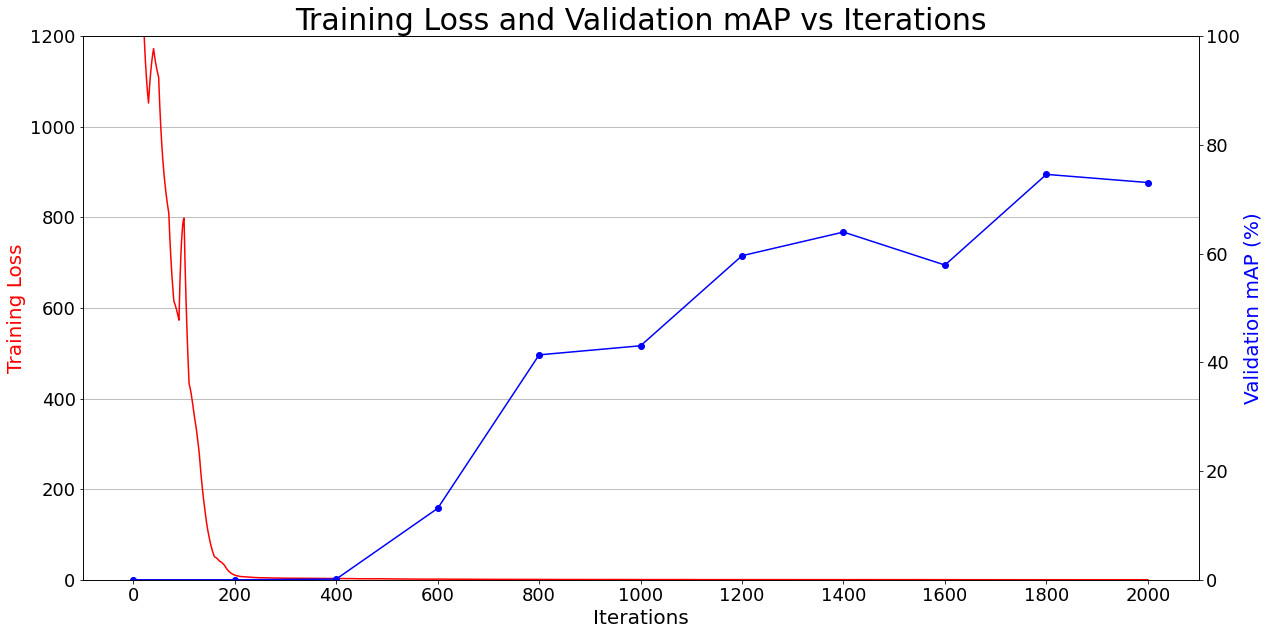

In [81]:
# plot loss and validation mAP together
# subplots
fig, ax1 = plt.subplots(figsize=(20,10))

# create dual axis
ax2 = ax1.twinx()
ax1.plot(iters, loss, 'r-')
ax2.plot(iterations, val_map, 'b-', marker='o')

# set y axis limits and ticks
ax1.set_ylim(0, 1200)
ax1.set_yticks([0, 200, 400, 600, 800, 1000, 1200])
ax2.set_ylim(0, 100)
ax2.set_yticks([0, 20, 40, 60, 80, 100])

# set x axis ticks
ax1.set_xticks(iterations)

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

# set labels
ax1.set_xlabel('Iterations', fontsize=20)
ax1.set_ylabel('Training Loss', color='r', fontsize=20)
ax2.set_ylabel('Validation mAP (%)', color='b', fontsize=20)

# grid lines
ax1.yaxis.grid(True)

plt.title('Training Loss and Validation mAP vs Iterations', fontsize=30)
plt.show()

In [0]:
net = cv2.dnn.readNetFromDarknet('cfg/yolov3_custom_train.cfg', '/mydrive/LicensePlateDetector/backup/yolov3_custom_train_800.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [0]:
# Load names of classes
classesFile = "data/obj.names";

classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

In [0]:
classes

['Bus', 'Car', 'Motorcycle', 'Truck', 'License Plate']

In [0]:
#cap = cv2.VideoCapture('/mydrive/LicensePlateDetector/test.jpg')
cap = cv2.VideoCapture('data/val/003a5aaf6d17c917.jpg')
outputFile = '/mydrive/LicensePlateDetector/prediction.jpg'

In [0]:
inpWidth = 416  #608     #Width of network's input image
inpHeight = 416 #608     #Height of network's input image
confThreshold = 0.1  #Confidence threshold
nmsThreshold = 0.1  #Non-maximum suppression threshold

In [0]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [0]:
# Draw the predicted bounding box
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 3)

    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (0, 0, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)

In [0]:
# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIds = []
    confidences = []
    boxes = []
    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        print("out.shape : ", out.shape)
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        box = boxes[i]
        print('box', box)
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)

out.shape :  (507, 10)
out.shape :  (2028, 10)
out.shape :  (8112, 10)
box [-148, 96, 1346, 483]
box [218, 264, 120, 82]


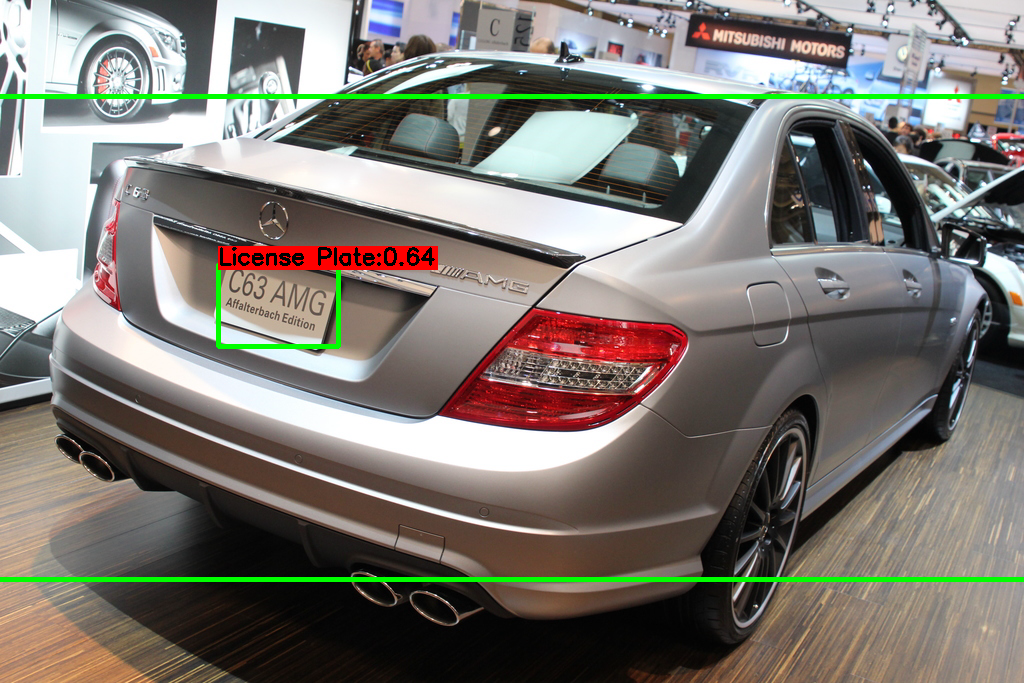

Done processing !!!
Output file is stored as  /mydrive/LicensePlateDetector/prediction.jpg


In [0]:
while cv2.waitKey(1) < 0:
    # get frame from the video
    hasFrame, frame = cap.read()

    # Stop the program if reached end of video
    if not hasFrame:
        print("Done processing !!!")
        print("Output file is stored as ", outputFile)
        cv2.waitKey(3000)
        break
    
    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

    # Sets the input to the network
    net.setInput(blob)

    # # Runs the forward pass to get output of the output layers
    outs = net.forward(getOutputsNames(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outs)

    # Put efficiency information. The function getPerfProfile returns the overall time for inference(t) and the timings for each of the layers(in layersTimes)
    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    #cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    # Write the frame with the detection boxes
    cv2_imshow(frame.astype(np.uint8))
    cv2.imwrite(outputFile, frame.astype(np.uint8))
    # if (args.image):
    #     cv.imwrite(outputFile, frame.astype(np.uint8));
    # else:
    #     vid_writer.write(frame.astype(np.uint8))

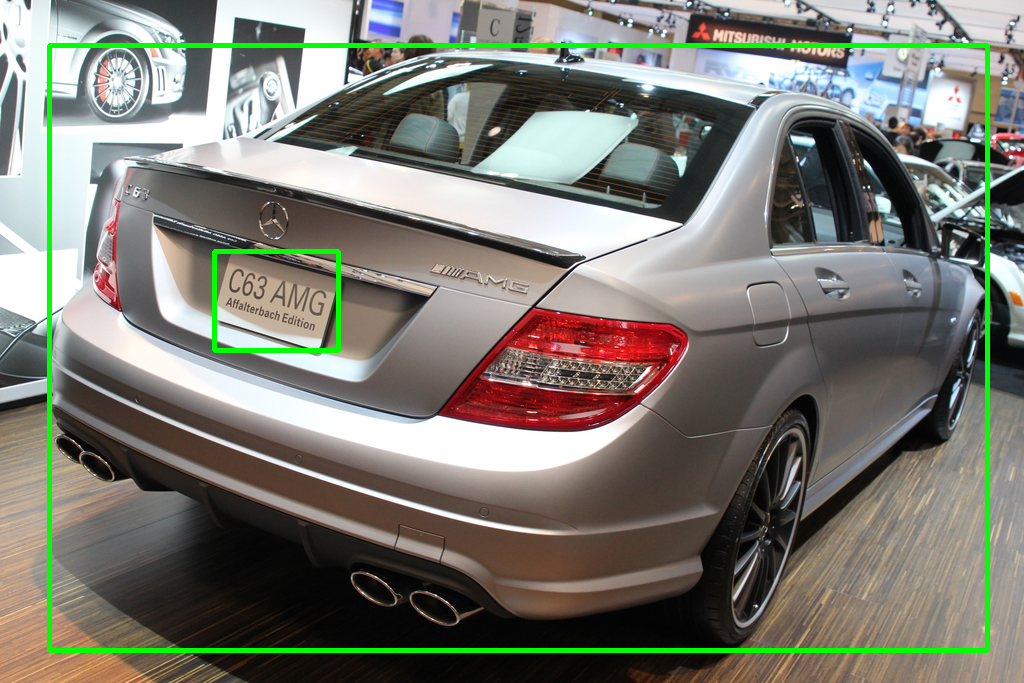

In [0]:
# truth label
im = cv2.imread('data/val/003a5aaf6d17c917.jpg')
cv2.rectangle(im, (214, 251), (338, 350), (0, 255, 0), 3)
cv2.rectangle(im, (49, 45), (987, 650), (0, 255, 0), 3)
cv2_imshow(im)